In [17]:
# Python script that selects theimportant parts of the data and visualizes them to gain insights
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
df = pd.read_csv("/kaggle/input/pizza-sales/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv")
connt = sqlite3.connect(":memory:")
df.to_sql("pizza_sales", connt, index=False, if_exists="replace")

query = """
SELECT sum(price)
FROM pizza_sales
"""

result_price = pd.read_sql_query(query, connt)
print(result_price)


test_query_results.to_csv("pizza_sales_raw_data.csv", index=False)

# # Show result
# print(result)
        


   sum(price)
0   817860.05


**Question 1 – Highest Revenue Pizza:** <small>Which pizza generates the highest total revenue?</small>




           pizza size     type  total_rev  total_orders  grand_total
0       thai_ckn    L  chicken   29257.50          1410    817860.05
1    five_cheese    L   veggie   26066.50          1409    817860.05
2    four_cheese    L   veggie   23622.20          1316    817860.05
3     spicy_ital    L  supreme   23011.75          1109    817860.05
4       big_meat    S  classic   22968.00          1914    817860.05
5     southw_ckn    L  chicken   21082.00          1016    817860.05
6        bbq_ckn    L  chicken   20584.00           992    817860.05
7       cali_ckn    L  chicken   19235.25           927    817860.05
8    classic_dlx    M  classic   18896.00          1181    817860.05
9       mexicana    L   veggie   17556.75           867    817860.05
10       bbq_ckn    M  chicken   16013.00           956    817860.05
11      cali_ckn    M  chicken   15812.00           944    817860.05
12     ital_supr    M  supreme   15526.50           941    817860.05
13     ital_supr    L  supreme   1

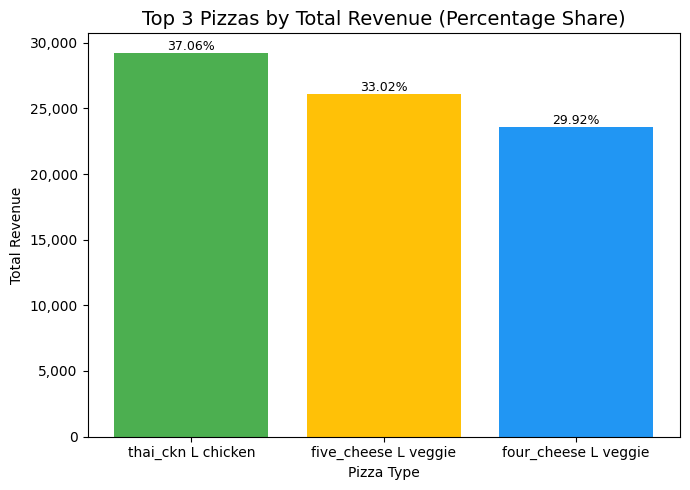

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV and create in-memory database
df = pd.read_csv("/kaggle/input/pizza-sales/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv")
conn1 = sqlite3.connect(":memory:")
df.to_sql("pizza_sales", conn1, index=False, if_exists="replace")  # ✅ use conn1 consistently

# SQL query
total_rev = """
SELECT name AS pizza, size, type, SUM(price) AS total_rev, count(*) as total_orders,
(SELECT SUM(price) FROM pizza_sales) as grand_total
FROM pizza_sales
GROUP BY name, size, type
ORDER BY total_rev DESC
LIMIT 20

"""
# Execute query
result_total_rev = pd.read_sql_query(total_rev, conn1)
print(result_total_rev)
print(" ")
print(" ")
#result_total_rev.to_csv("/kaggle/working/total_revenue.csv", index=False)
#####################################################################################
# graph for the top 3 selling pizza
pizza = ['thai_ckn L chicken', 'five_cheese L veggie', 'four_cheese L veggie']
values = [29257.50, 26066.50, 23622.20]

plt.figure(figsize=(7, 5))
bars = plt.bar(pizza, values, color=['#4CAF50', '#FFC107', '#2196F3'])
total = sum(values)
for bar in bars:
    percent = (bar.get_height() / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{percent:.2f}%', ha='center', va='bottom', fontsize=9)

plt.yticks(range(0, int(max(values)) + 5000, 5000), 
           [f'{y:,}' for y in range(0, int(max(values)) + 5000, 5000)])

plt.title('Top 3 Pizzas by Total Revenue (Percentage Share)', fontsize=14)
plt.xlabel('Pizza Type')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

### Highest Revenue Pizza: Which pizza generates the highest total revenue?

The results from the query show the **top 3 best-selling pizzas**:

1. **thai_ckn (large, chicken type)**
2. **five_cheese (large, veggie type)**
3. **four_cheese (large, veggie type)**

As illustrated in the graph, the **thai_ckn large chicken pizza generates the highest total revenue**, amounting to **$29,257.50**, which represents **37.6% of the revenue among the top 3 pizzas**.  

This indicates that the large chicken variant of the Thai chicken pizza is the most popular and contributes the largest portion of sales within the top-selling pizzas. Showing the top 3 pizzas provides context for comparison and highlights other high-performing pizzas.


**Question 2 -  Peak Sales by Month, Day, and Hour**: <small>For the pizza with the highest revenue, in which month, day, and hour does it sell the most?</small>


       pizza size     type month  total_revenue  total_orders
0   thai_ckn    L  chicken   Dec        2801.25           135
1   thai_ckn    L  chicken   Jul        2801.25           135
2   thai_ckn    L  chicken   Sep        2552.25           123
3   thai_ckn    L  chicken   Jan        2469.25           119
4   thai_ckn    L  chicken   Jun        2448.50           118
5   thai_ckn    L  chicken   Mar        2448.50           118
6   thai_ckn    L  chicken   May        2427.75           117
7   thai_ckn    L  chicken   Nov        2427.75           117
8   thai_ckn    L  chicken   Apr        2407.00           116
9   thai_ckn    L  chicken   Oct        2365.50           114
10  thai_ckn    L  chicken   Aug        2137.25           103
11  thai_ckn    L  chicken   Feb        1971.25            95
 
 


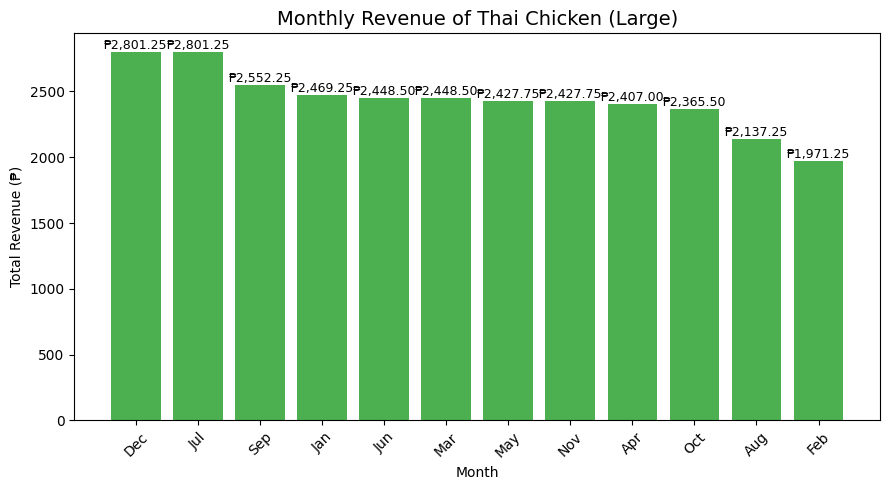

In [4]:
# month
monthly_query = """
SELECT 
    name AS pizza,
    size,
    type,
    CASE strftime('%m', date)
        WHEN '01' THEN 'Jan'
        WHEN '02' THEN 'Feb'
        WHEN '03' THEN 'Mar'
        WHEN '04' THEN 'Apr'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'Jun'
        WHEN '07' THEN 'Jul'
        WHEN '08' THEN 'Aug'
        WHEN '09' THEN 'Sep'
        WHEN '10' THEN 'Oct'
        WHEN '11' THEN 'Nov'
        WHEN '12' THEN 'Dec'
    END AS month,
    ROUND(SUM(price), 2) AS total_revenue,
    COUNT(*) AS total_orders
FROM pizza_sales
WHERE name = 'thai_ckn'
  AND size = 'L'
  AND type = 'chicken'
GROUP BY name, size, type, month
ORDER BY total_revenue DESC;
"""
monthly_query_results = pd.read_sql_query(monthly_query, conn1)
print(monthly_query_results)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print(" ")
print(" ")
plt.figure(figsize=(9,5))
bars = plt.bar(
    monthly_query_results['month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True)),
    monthly_query_results['total_revenue'],
    color='#4CAF50'
)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f"₱{bar.get_height():,.2f}", ha='center', va='bottom', fontsize=9)

# Labels and title
plt.title('Monthly Revenue of Thai Chicken (Large)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (₱)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# The Thai Chicken (Large) pizza achieved its highest sales in July and December,
# both reaching ₱2,801.25 from 135 orders.
# These peaks indicate that demand increases during mid-year and holiday months,
# suggesting possible seasonal buying behavior.


#Analysis of the sales data shows that the Thai Chicken (Large) pizza reaches its highest sales in July and December. 
#This pattern suggests that mid-year holidays and year-end celebrations may contribute to increased demand, although other factors not captured in the dataset could also play a role. 
#February shows a slight decrease in sales, possibly reflecting the post-New Year period when customers return to regular routines. From March to July, sales steadily rise and remain relatively consistent, with July reaching the highest peak. 
#August experiences a slight dip, which may reflect mid-year routines or fewer holidays, before sales increase again and maintain high values through the end of the year, culminating in December’s peak.”

### Peak Sales by Month: For the Thai Chicken (Large) Pizza

The analysis shows that the **Thai Chicken (Large) pizza** achieves its highest revenue in **July and December**, each generating approximately **₱2,801.25** from **135 orders**.  

This trend suggests that demand increases during **mid-year holidays** and **year-end celebrations**, reflecting seasonal buying behavior. February shows a slight dip, likely due to the post-New Year period, while sales steadily rise from March to July, dip slightly in August, and remain high through December.


      pizza size     type day_of_week  total_orders  total_revenue
0  thai_ckn    L  chicken         Fri           244        5063.00
1  thai_ckn    L  chicken         Thu           213        4419.75
2  thai_ckn    L  chicken         Sat           205        4253.75
3  thai_ckn    L  chicken         Wed           204        4233.00
4  thai_ckn    L  chicken         Tue           195        4046.25
5  thai_ckn    L  chicken         Mon           175        3631.25
6  thai_ckn    L  chicken         Sun           174        3610.50
 
 


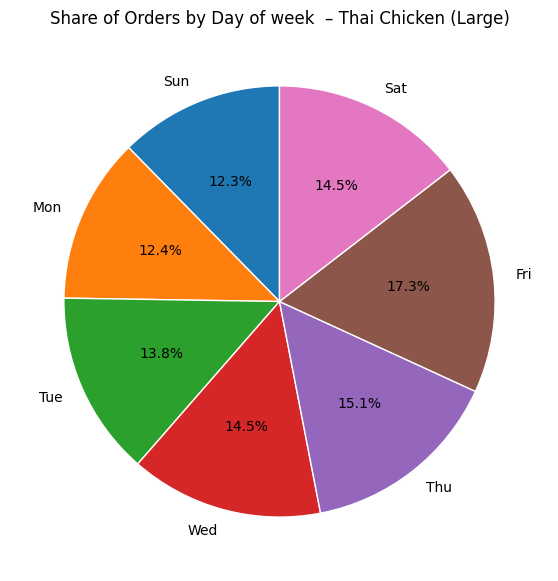

In [12]:

day_query = """
SELECT 
    name AS pizza,
    size,
    type,
    CASE strftime('%w', date)
        WHEN '0' THEN 'Sun'
        WHEN '1' THEN 'Mon'
        WHEN '2' THEN 'Tue'
        WHEN '3' THEN 'Wed'
        WHEN '4' THEN 'Thu'
        WHEN '5' THEN 'Fri'
        WHEN '6' THEN 'Sat'
    END AS day_of_week,
    COUNT(*) AS total_orders,
    ROUND(SUM(price), 2) AS total_revenue
FROM pizza_sales
WHERE name = 'thai_ckn'
  AND size = 'L'
  AND type = 'chicken'
GROUP BY name, size, type, day_of_week
ORDER BY total_orders DESC;
"""
day_query_results = pd.read_sql_query(day_query, conn1)
print(day_query_results)
print(" ")
print(" ")
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
day_query_results['day_of_week'] = pd.Categorical(day_query_results['day_of_week'], categories=day_order, ordered=True)
day_query_results = day_query_results.sort_values('day_of_week')

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(
    day_query_results['total_orders'],
    labels=day_query_results['day_of_week'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Share of Orders by Day of week  – Thai Chicken (Large)')
plt.show()

#The data reveals that Friday has the highest number of orders (244), followed by Thursday and Saturday.
#This trend suggests that pizza demand rises toward the weekend, likely because people celebrate the end of the workweek or enjoy social gatherings.
#In contrast, Sunday and Monday record the fewest orders, possibly because customers are resting, preparing for the week ahead, or resuming regular routines.


### Peak Sales by Day: For the Thai Chicken (Large) Pizza

The analysis shows that **Friday** has the highest number of orders (**244 orders**), followed by **Thursday** and **Saturday**.  

This trend suggests that pizza demand rises toward the **weekend**, likely due to end-of-week celebrations or social gatherings. In contrast, **Sunday** and **Monday** have the fewest orders, possibly because customers are resting, preparing for the week ahead, or resuming regular routines.


       pizza size     type hour  total_revenue  total_orders pct_change
0   thai_ckn    L  chicken   10          20.75             1         0%
1   thai_ckn    L  chicken   11        1577.00            76    7500.0%
2   thai_ckn    L  chicken   12        3652.00           176    131.58%
3   thai_ckn    L  chicken   13        3942.50           190      7.95%
4   thai_ckn    L  chicken   14        2324.00           112    -41.05%
5   thai_ckn    L  chicken   15        1701.50            82    -26.79%
6   thai_ckn    L  chicken   16        2676.75           129     57.32%
7   thai_ckn    L  chicken   17        2718.25           131      1.55%
8   thai_ckn    L  chicken   18        3361.50           162     23.66%
9   thai_ckn    L  chicken   19        2697.50           130    -19.75%
10  thai_ckn    L  chicken   20        2303.25           111    -14.62%
11  thai_ckn    L  chicken   21        1494.00            72    -35.14%
12  thai_ckn    L  chicken   22         767.75            37    

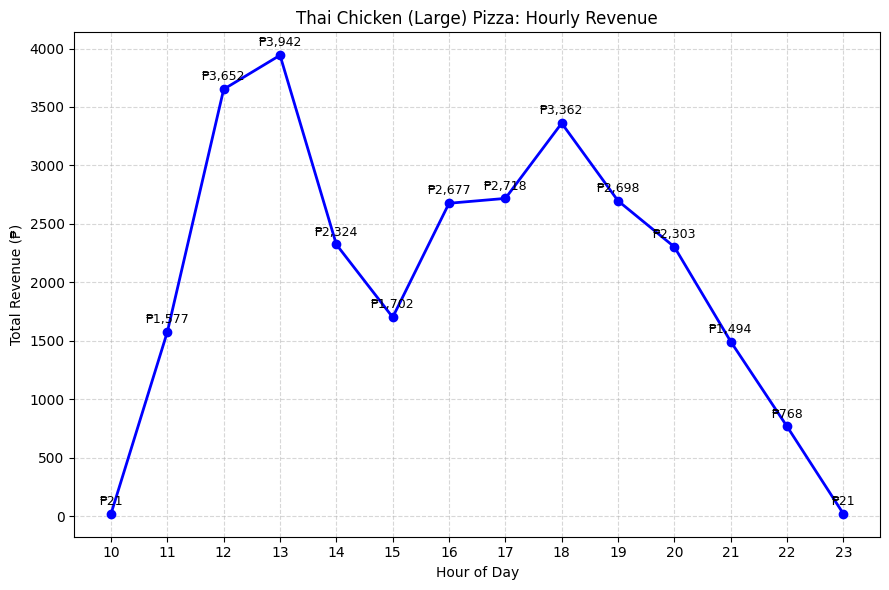

In [6]:
hourly_query = """
WITH hourly_cte AS (
    SELECT 
        name as pizza,
        size,
        type,
        strftime('%H', time) AS hour,
        SUM(price) AS total_revenue,
        count(*) as total_orders
    FROM pizza_sales
    WHERE name = 'thai_ckn'
      AND size = 'L'
      AND type = 'chicken'
    GROUP BY name, size, type, hour
    ORDER BY hour ASC
)
SELECT 
    pizza,
    size,
    type,
    hour,
    total_revenue,
    total_orders,
    CASE 
        WHEN LAG(total_revenue) OVER (ORDER BY hour) IS NULL THEN '0%'
        ELSE ROUND( ((total_revenue - LAG(total_revenue) OVER (ORDER BY hour)) 
                 / LAG(total_revenue) OVER (ORDER BY hour)) * 100,2) || '%' END AS pct_change
FROM hourly_cte;
"""
hourly_results = pd.read_sql_query(hourly_query, conn1)
print(hourly_results)
print("")
print(" ")

hourly_results['hour'] = hourly_results['hour'].astype(int)

plt.figure(figsize=(9,6))
# Plot total revenue
plt.plot(
    hourly_results['hour'], 
    hourly_results['total_revenue'], 
    color='blue', 
    marker='o', 
    linewidth=2
)

# Labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue (₱)')
plt.title('Thai Chicken (Large) Pizza: Hourly Revenue')
plt.xticks(hourly_results['hour'])  # show all hours
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: add value labels on top of each point
for x, y in zip(hourly_results['hour'], hourly_results['total_revenue']):
    plt.text(x, y + 50, f'₱{y:,.0f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


#Pizza orders start increasing around 10 AM, peaking between 11 AM and 1 PM as people take lunch or snacks.
#Orders dip slightly at 2–3 PM while most are at work, then rise again 4–6 PM when people leave work. 
#After 6 PM, orders gradually decline as customers settle at home.



#The Thai Chicken (Large) pizza, which generates the highest revenue among all offerings, exhibits clear patterns in its sales. 
#Monthly sales peak in July and December, each achieving ₱2,801.25 from 135 orders, indicating increased demand during mid-year and holiday periods. 
#On a weekly level, Friday experiences the highest number of orders (244), followed by Thursday and Saturday, suggesting that customers favor pizza toward the weekend. 
#Hourly analysis reveals that the busiest time of day is 1 PM, generating the highest revenue of ₱3,942.50 from 190 orders, which demonstrates that customer demand concentrates during specific hours. 
#These trends provide actionable insights for inventory planning, staffing, and targeted promotions to maximize revenue during peak periods.

### Peak Sales by Hour: For the Thai Chicken (Large) Pizza

The analysis shows that pizza orders start increasing around **10 AM**, peaking between **11 AM and 1 PM** as people take lunch or snacks. Orders dip slightly around **2–3 PM** while most customers are at work, then rise again from **4–6 PM** when people leave work. After **6 PM**, orders gradually decline as customers settle at home.  

The **busiest hour** is **1 PM**, generating the highest revenue of approximately **₱3,942.50** from **190 orders**, indicating that customer demand is concentrated during specific hours.  

These patterns provide insights for **inventory planning, staffing, and targeted promotions** to maximize revenue during peak periods.


**Question 3 – Consistency of Sales Peaks**: <small>Based on the pizza with the highest revenue, what are its peak sales hours across all days, and how consistent are those peaks?</small>



   month  hr10  hr11  hr12  hr13  hr14  hr15  hr16  hr17  hr18  hr19  hr20  \
0    Jan     0     7    15    14    15     9    11     6    13    13     9   
1    Feb     0     7     9    12     9     8    11     9    11     6     5   
2    Mar     0     5    13    13     8     7    16    15    11    14    11   
3    Apr     0     4    20    18     4     7    10    12    15     9     7   
4    May     1     6    21    10     8     6     9    14     5    13    15   
5    Jun     0     6    14    12    15     5    17    13    14     7     6   
6    Jul     0     9    13    24     7     3    12    14    14    11    15   
7    Aug     0     6    13    13     8     9     7    10    10     8     8   
8    Sep     0     8    10    16    13     5    10    13    16    15     6   
9    Oct     0     5    17    17    11     5     8     8    16    11     9   
10   Nov     0     7    15    19     8     8     7     7    20    12     7   
11   Dec     0     6    16    22     6    10    11    10    17  

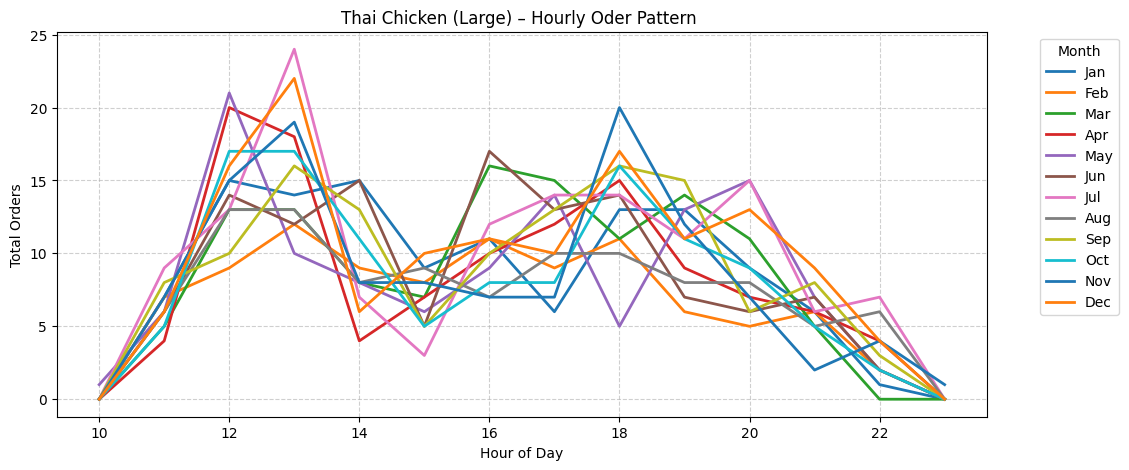

In [7]:
peak_query = """
SELECT
    CASE strftime('%m', date)
        WHEN '01' THEN 'Jan'
        WHEN '02' THEN 'Feb'
        WHEN '03' THEN 'Mar'
        WHEN '04' THEN 'Apr'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'Jun'
        WHEN '07' THEN 'Jul'
        WHEN '08' THEN 'Aug'
        WHEN '09' THEN 'Sep'
        WHEN '10' THEN 'Oct'
        WHEN '11' THEN 'Nov'
        WHEN '12' THEN 'Dec'
    END AS month,

    SUM(CASE WHEN strftime('%H', time) = '10' THEN 1 ELSE 0 END) AS hr10,
    SUM(CASE WHEN strftime('%H', time) = '11' THEN 1 ELSE 0 END) AS hr11,
    SUM(CASE WHEN strftime('%H', time) = '12' THEN 1 ELSE 0 END) AS hr12,
    SUM(CASE WHEN strftime('%H', time) = '13' THEN 1 ELSE 0 END) AS hr13,
    SUM(CASE WHEN strftime('%H', time) = '14' THEN 1 ELSE 0 END) AS hr14,
    SUM(CASE WHEN strftime('%H', time) = '15' THEN 1 ELSE 0 END) AS hr15,
    SUM(CASE WHEN strftime('%H', time) = '16' THEN 1 ELSE 0 END) AS hr16,
    SUM(CASE WHEN strftime('%H', time) = '17' THEN 1 ELSE 0 END) AS hr17,
    SUM(CASE WHEN strftime('%H', time) = '18' THEN 1 ELSE 0 END) AS hr18,
    SUM(CASE WHEN strftime('%H', time) = '19' THEN 1 ELSE 0 END) AS hr19,
    SUM(CASE WHEN strftime('%H', time) = '20' THEN 1 ELSE 0 END) AS hr20,
    SUM(CASE WHEN strftime('%H', time) = '21' THEN 1 ELSE 0 END) AS hr21,
    SUM(CASE WHEN strftime('%H', time) = '22' THEN 1 ELSE 0 END) AS hr22,
    SUM(CASE WHEN strftime('%H', time) = '23' THEN 1 ELSE 0 END) AS hr23,

    COUNT(*) AS grand_total
FROM pizza_sales
WHERE name = 'thai_ckn'
  AND size = 'L'
  AND type = 'chicken'
GROUP BY month
ORDER BY CAST(strftime('%m', date) AS INTEGER);
"""

peak_results = pd.read_sql_query(peak_query, conn1)
print(peak_results)
print(" ")
print(" ")
df = peak_results.set_index('month').drop(columns=['grand_total']).T
df.index = [c.replace('hr','') for c in df.index]  # make hours clean
df.plot(figsize=(12,5), linewidth=2)

plt.title('Thai Chicken (Large) – Hourly Oder Pattern ')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#The data shows a clear pattern across most months. Orders start to increase from 10 AM and reach their peak at 1 PM. 
#After 1 PM, sales decline until around 3 PM, then rise again between 3 PM and 6 PM before dropping steadily for the rest of the evening. 
#Although not all months follow this pattern exactly, the majority display the same trend, indicating a consistent daily sales rhythm.

### Consistency of Sales Peaks: Thai Chicken (Large) Pizza

The data shows a clear hourly sales pattern across most months. Orders start to increase from **10 AM** and reach their **peak at 1 PM**. After 1 PM, sales decline until around 3 PM, then rise again between **3 PM and 6 PM** before dropping steadily for the rest of the evening.  

Although not all months follow this pattern exactly, the majority display the same trend, indicating a **consistent daily sales rhythm**.  

*Note:* The query was designed in a **pivot-style format**, making it more understandable and intuitive by showing hourly orders for each month in a single table.


In [8]:
test_query2 = """

WITH base1 AS (
    SELECT 
        name AS pizza, 
        size, 
        type, 
        strftime('%m', date) AS month, 
        strftime('%d', date) AS day, 
        SUM(price) AS revenue,
        COUNT(*) AS orders
    FROM pizza_sales
    WHERE (name = 'thai_ckn' AND size = 'L' AND type = 'chicken')
       OR (name = 'five_cheese' AND size = 'L' AND type = 'veggie')
       OR (name = 'four_cheese' AND size = 'L' AND type = 'veggie')
    GROUP BY pizza, size, type, month, day
),

monthly_totals AS (
    SELECT
        pizza,
        size,
        type,
        month,
        SUM(revenue) AS total_rev,         
        SUM(orders) AS total_orders,       
        AVG(orders) AS avg_orders_per_day  
    FROM base1
    GROUP BY pizza, size, type, month
),

base2 AS (
    SELECT 
        name AS pizza, 
        size, 
        type, 
        strftime('%m', date) AS month, 
        strftime('%d', date) AS day,
        strftime('%H', time) AS hour,
        SUM(price) AS revenue_in_hour,
        COUNT(*) AS orders_in_hour
    FROM pizza_sales
    WHERE (name = 'thai_ckn' AND size = 'L' AND type = 'chicken')
       OR (name = 'five_cheese' AND size = 'L' AND type = 'veggie')
       OR (name = 'four_cheese' AND size = 'L' AND type = 'veggie')
    GROUP BY pizza, size, type, month, day, hour
),

-- Rank by total revenue to find top pizza
ranked_pizzas AS (
    SELECT
        pizza,
        size,
        type,
        SUM(revenue_in_hour) AS total_revenue
    FROM base2
    GROUP BY pizza, size, type
    ORDER BY total_revenue DESC
    LIMIT 1
),

-- Find the single highest-selling moment for that pizza
peak_moment AS (
    SELECT 
        b2.pizza,
        b2.size,
        b2.type,
        b2.month,
        b2.day,
        b2.hour,
        SUM(b2.revenue_in_hour) AS revenue,
        COUNT(*) AS orders
    FROM base2 b2
    INNER JOIN ranked_pizzas rp 
        ON b2.pizza = rp.pizza
        AND b2.size = rp.size
        AND b2.type = rp.type
    GROUP BY b2.pizza, b2.size, b2.type, b2.month, b2.day, b2.hour
    ORDER BY revenue DESC
    LIMIT 1
)

SELECT 
    pizza,
    size,
    type,
    month,
    day,
    hour AS peak_hour,
    ROUND(revenue, 2) AS peak_revenue,
    orders AS peak_orders
FROM peak_moment;

"""
test_query2_results = pd.read_sql_query(test_query2, conn1)
print(test_query2_results)


      pizza size     type month day peak_hour  peak_revenue  peak_orders
0  thai_ckn    L  chicken    04  04        18        103.75            1


In [9]:
peak_query = """
SELECT
    date(date) AS order_date,
    strftime('%H', time) AS hour,
    COUNT(*) AS total_orders,
    ROUND(SUM(price), 2) AS total_revenue
FROM pizza_sales
WHERE name = 'thai_ckn'
  AND size = 'L'
  AND type = 'chicken'
GROUP BY order_date, hour
ORDER BY order_date, hour
"""
peak_results = pd.read_sql_query(peak_query, conn1)
print(peak_results)

peak_results.to_csv("peak_3.csv", index=False)


      order_date hour  total_orders  total_revenue
0     2015-01-01   11             1          20.75
1     2015-01-01   13             1          20.75
2     2015-01-01   14             1          20.75
3     2015-01-01   15             1          20.75
4     2015-01-01   16             1          20.75
...          ...  ...           ...            ...
1164  2015-12-29   13             1          20.75
1165  2015-12-29   18             2          41.50
1166  2015-12-30   11             1          20.75
1167  2015-12-30   17             1          20.75
1168  2015-12-31   18             1          20.75

[1169 rows x 4 columns]
